In [1]:
from __future__ import print_function
import ROOT
from ROOT import TChain
from larcv import larcv

Welcome to JupyROOT 6.26/08


In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ROOT.TFile.Open('../data/root/test_40k.root').ls()

TFile**		../data/root/test_40k.root	
 TFile*		../data/root/test_40k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


40000 entries found!
Object type: <cppyy.gbl.larcv.EventImage2D object at 0x55c7fa6c3d20>


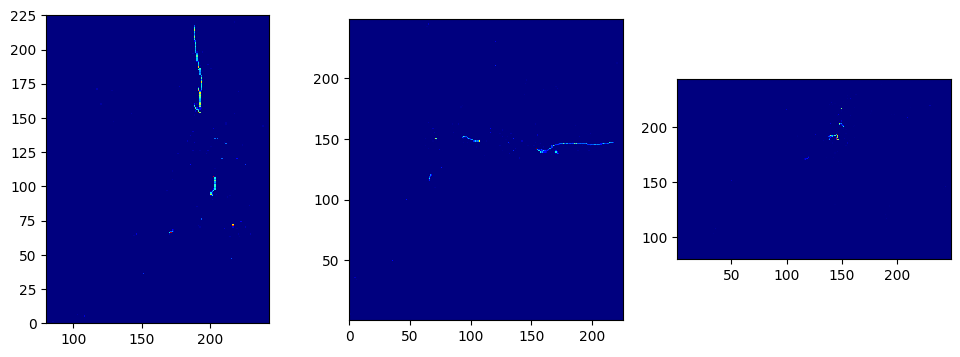

In [4]:
from larcv import larcv

# Create TChain, count # of entries
chain_image2d = ROOT.TChain('image2d_data_tree')
chain_image2d.AddFile('../data/root/test_40k.root')
print(chain_image2d.GetEntries(),'entries found!')

# Get a specific event (first entry)
chain_image2d.GetEntry(0)
cpp_object = chain_image2d.image2d_data_branch
print('Object type:',cpp_object)

# Get std::vector<larcv::Image2D>
image2d_array = cpp_object.as_vector()
# Dump images
fig, axes = plt.subplots(1, image2d_array.size(), figsize=(12,4), facecolor='w')
for index,image2d in enumerate(image2d_array):
    image2d_numpy = larcv.as_ndarray(image2d)
    axes[index].imshow(image2d_numpy, interpolation='none',cmap='jet')
    # Find bounds for non-zero pixels + padding of 5 pixels
    nz_pixels=np.where(image2d_numpy>0.0)
    ylim = (np.min(nz_pixels[0])-5,np.max(nz_pixels[0])+5)
    xlim = (np.min(nz_pixels[1])-5,np.max(nz_pixels[1])+5)
    # Adjust for allowed image range
    ylim = (np.max((ylim[0],0)), np.min((ylim[1],image2d_numpy.shape[1]-1)))
    xlim = (np.max((xlim[0],0)), np.min((xlim[1],image2d_numpy.shape[0]-1)))
    # Set range
    axes[index].set_ylim(ylim)
    axes[index].set_xlim(xlim)
plt.show()

In [5]:
# Create TChain, count # of entries
chain_particle = ROOT.TChain('particle_mctruth_tree')
chain_particle.AddFile('../data/root/test_40k.root')
print(chain_image2d.GetEntries(),'entries found!')

# Get a specific event (first entry)
chain_particle.GetEntry(0)
cpp_object = chain_particle.particle_mctruth_branch
print('Object type: {}\n'.format(str(cpp_object)))

# Dump particle information
print('Checking particle information for 1st entry...')
for particle in cpp_object.as_vector():
    print('PDG Code: {}'.format(particle.pdg_code()))
    print('Initial energy: {:.3} GeV'.format(particle.energy_init()))

40000 entries found!
Object type: <cppyy.gbl.larcv.EventParticle object at 0x55c7fb15aa20>

Checking particle information for 1st entry...
PDG Code: 11
Initial energy: 0.138 GeV


### What is the shape of each image?

In [6]:
# Get a specific event (first entry)
chain_image2d.GetEntry(1)
cpp_object = chain_image2d.image2d_data_branch

# Get std::vector<larcv::Image2D>
image2d_array = cpp_object.as_vector()

for index,image2d in enumerate(image2d_array):
    image2d_numpy = larcv.as_ndarray(image2d)
    print(image2d_numpy.shape)

(256, 256)
(256, 256)
(256, 256)


### How many images are in each events?

In [10]:
# training data
chain_image2d_train = ROOT.TChain('image2d_data_tree')
chain_image2d_train.AddFile('../data/root/train_50k.root')
N_train = chain_image2d_train.GetEntries()
print(N_train)
X = np.zeros(shape=(N_train, 3, 256, 256), dtype=float)

events = {}
N_images = np.zeros(shape=(N_train, 1), dtype=float)

for i in tqdm(range(N_train)):
    chain_image2d_train.GetEntry(i)
    cpp_object = chain_image2d_train.image2d_data_branch
    image2d_array = cpp_object.as_vector()
    N_image = image2d_array.size()
    N_images[i] = N_image
    
    if N_image not in events.keys():
        events[N_image] = [i]
    else:
        events[N_image].append(i)

50000


100%|███████████████████████████████████████████████| 50000/50000 [00:28<00:00, 1748.78it/s]


[]

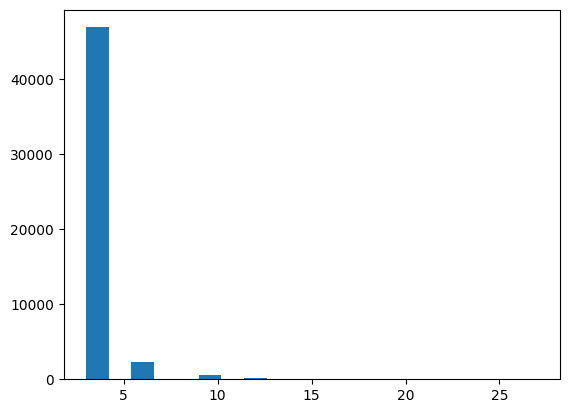

In [11]:
plt.hist(N_images, bins=20)
plt.plot()

In [12]:
print(events.keys())

dict_keys([3, 6, 9, 12, 15, 18, 27, 21])


### How many particles are in those events that have Nx3 images

In [13]:
chain_particle_train = ROOT.TChain('particle_mctruth_tree')
chain_particle_train.AddFile('../data/root/train_50k.root')
print(chain_image2d_train.GetEntries(),'entries found!')

pdgIds = []
for i in events[3]:
    chain_particle_train.GetEntry(i)
    cpp_object = chain_particle_train.particle_mctruth_branch
    for index, particle in enumerate(cpp_object.as_vector()):
        if index!=0:    
            print('Initial energy: {:.3} GeV'.format(particle.energy_init()))
        else:
            if particle.pdg_code() not in pdgIds:
                pdgIds.append(particle.pdg_code())

print(pdgIds)

50000 entries found!
[11, 22, 13, 211, 2212]


### Are those Nx3 images the same?

Object type: <cppyy.gbl.larcv.EventImage2D object at 0x55c7fb4d9c70>


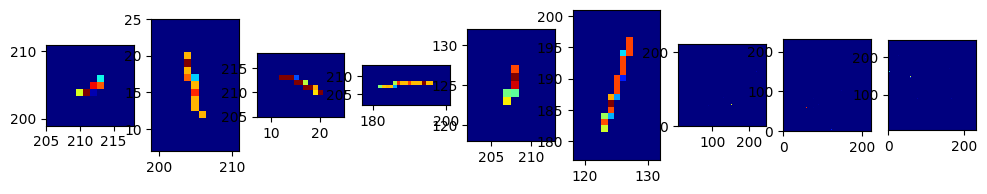

In [14]:
num_images = 9
event = events[num_images][4] # pick a event

chain_image2d_train.GetEntry(event)
cpp_object = chain_image2d_train.image2d_data_branch
print('Object type:',cpp_object)

# Get std::vector<larcv::Image2D>
image2d_array = cpp_object.as_vector()
# Dump images
fig, axes = plt.subplots(1, image2d_array.size(), figsize=(12,4), facecolor='w')
for index,image2d in enumerate(image2d_array):
    image2d_numpy = larcv.as_ndarray(image2d)
    axes[index].imshow(image2d_numpy, interpolation='none',cmap='jet')
    # Find bounds for non-zero pixels + padding of 5 pixels
    nz_pixels=np.where(image2d_numpy>0.0)
    ylim = (np.min(nz_pixels[0])-5,np.max(nz_pixels[0])+5)
    xlim = (np.min(nz_pixels[1])-5,np.max(nz_pixels[1])+5)
    # Adjust for allowed image range
    ylim = (np.max((ylim[0],0)), np.min((ylim[1],image2d_numpy.shape[1]-1)))
    xlim = (np.max((xlim[0],0)), np.min((xlim[1],image2d_numpy.shape[0]-1)))
    # Set range
    axes[index].set_ylim(ylim)
    axes[index].set_xlim(xlim)
plt.show()

### Make input data

In [3]:
from pathlib import Path

### set I/O path
data_dir = Path.cwd().parent.joinpath('data')
root_dir = data_dir.joinpath('root')
np_dir = data_dir.joinpath('numpy')

root_train_path = root_dir.joinpath('train_50k.root')
root_test_path = root_dir.joinpath('test_40k.root')
X_train_path = np_dir.joinpath('X_train.npy')
X_test_path = np_dir.joinpath('X_test.npy')
Y_train_path = np_dir.joinpath('Y_train.npy')
Y_test_path = np_dir.joinpath('Y_test.npy')

In [4]:
### make training/test set using events of only 3 images
# X_train/X_test
chain_image2d_train = ROOT.TChain('image2d_data_tree')
chain_image2d_train.AddFile(str(root_train_path))
N_train = chain_image2d_train.GetEntries()
X_train = []

chain_image2d_test = ROOT.TChain('image2d_data_tree')
chain_image2d_test.AddFile(str(root_test_path))
N_test = chain_image2d_test.GetEntries()
X_test = []

In [ ]:
for i in tqdm(range(N_train)):
    chain_image2d_train.GetEntry(i)
    cpp_object = chain_image2d_train.image2d_data_branch
    image2d_array = cpp_object.as_vector()
    N_image = image2d_array.size()
    
    if N_image == 3:
        image2d_numpy = np.zeros(shape=(3, 256, 256), dtype=float)
        for view, image2d in enumerate(image2d_array):
            image2d_numpy[view] = larcv.as_ndarray(image2d)
        X_train.append(image2d_numpy)

   
        
X_train = np.array(X_train, dtype=float)
print(X_train.shape)
np.save(X_train_path, X_train)

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 30804/50000 [00:34<00:57, 331.07it/s]

In [ ]:
for i in tqdm(range(N_test)):
    chain_image2d_test.GetEntry(i)
    cpp_object = chain_image2d_test.image2d_data_branch
    image2d_array = cpp_object.as_vector()
    N_image = image2d_array.size()
    
    if N_image == 3:
        image2d_numpy = np.zeros(shape=(3, 256, 256), dtype=float)
        for view, image2d in enumerate(image2d_array):
            image2d_numpy[view] = larcv.as_ndarray(image2d)
        X_test.append(image2d_numpy)     
        
X_test = np.array(X_test, dtype=float)
print(X_test.shape)
np.save(X_test_path, X_test)

### Make target data

In [10]:
# Y_train/Y_test

# look-up table
pdgId2vec = {}
pdgId2vec[11] = np.array([1,0,0,0,0], dtype=float)
pdgId2vec[13] = np.array([0,1,0,0,0], dtype=float)
pdgId2vec[22] = np.array([0,0,1,0,0], dtype=float)
pdgId2vec[211] = np.array([0,0,0,1,0], dtype=float)
pdgId2vec[2212] = np.array([0,0,0,0,1], dtype=float)

chain_particle_train = ROOT.TChain('particle_mctruth_tree')
chain_particle_train.AddFile(str(root_train_path))
Y_train = []

chain_particle_test = ROOT.TChain('particle_mctruth_tree')
chain_particle_test.AddFile(str(root_test_path))
Y_test = []
                           
for i in tqdm(range(N_train)):
    chain_particle_train.GetEntry(i)
    cpp_object = chain_particle_train.particle_mctruth_branch
    for index, particle in enumerate(cpp_object.as_vector()):
        if index!=0:    
            print(f'Event {i} has more than 1 events! Wrong dataset?')
        else:
            pdgId = particle.pdg_code()
            Y_train.append(pdgId2vec[pdgId])
            
for i in tqdm(range(N_test)):
    chain_particle_test.GetEntry(i)
    cpp_object = chain_particle_test.particle_mctruth_branch
    for index, particle in enumerate(cpp_object.as_vector()):
        if index!=0:    
            print(f'Event {i} has more than 1 events! Wrong dataset?')
        else:
            pdgId = particle.pdg_code()
            Y_test.append(pdgId2vec[pdgId])
            
Y_train = np.array(Y_train, dtype=float)
Y_test = np.array(Y_test, dtype=float)
print(Y_train.shape)
print(Y_test.shape)
np.save(Y_train_path, Y_train)
np.save(Y_test_path, Y_test)

100%|█████████████████████████████████████████████| 40000/40000 [00:00<00:00, 182871.49it/s]


(50000, 5)
(40000, 5)
